# Import Libraries

In [1]:
#import libraries
import pandas as pd
import seaborn as sns

# Download dataset from Kaggle

In [2]:
#set kaggle API credentials
import os
os.environ['KAGGLE_USERNAME'] = 'kalyankumar12'
os.environ['KAGGLE_KEY'] = '5262834c1d6737bf92232f5975154bc9'

In [3]:
#download dataset
! kaggle datasets download -d uciml/breast-cancer-wisconsin-data

Dataset URL: https://www.kaggle.com/datasets/uciml/breast-cancer-wisconsin-data
License(s): CC-BY-NC-SA-4.0
  0% 0.00/48.6k [00:00<?, ?B/s]
100% 48.6k/48.6k [00:00<00:00, 75.2MB/s]


In [4]:
#unzip file
! unzip /content/breast-cancer-wisconsin-data.zip

Archive:  /content/breast-cancer-wisconsin-data.zip
  inflating: data.csv                


# Load & Explore Data

In [5]:
#load data on dataframe
df=pd.read_csv('/content/data.csv')

In [6]:
#display dataframe
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [7]:
#count of rows and columns
df.shape

(569, 33)

In [8]:
#count number of null(empty) values
df.isna().sum()


,0
id,0
diagnosis,0
radius_mean,0
texture_mean,0
perimeter_mean,0
area_mean,0
smoothness_mean,0
compactness_mean,0
concavity_mean,0
concave points_mean,0


In [9]:
# Drop the column with null values
df.dropna(axis=1,inplace=True)

In [10]:
# count of rows and columns
df.shape

(569, 32)

In [11]:
#Get count of number of M or B cells in diagnosis
df['diagnosis'].value_counts()

,count
diagnosis,
B,357
M,212


# Label Encoding

In [12]:
#Get Datatypes of each column in our dataset
df.dtypes

,0
id,int64
diagnosis,object
radius_mean,float64
texture_mean,float64
perimeter_mean,float64
area_mean,float64
smoothness_mean,float64
compactness_mean,float64
concavity_mean,float64
concave points_mean,float64


In [13]:
#Encode the diagnosis values
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()
df.iloc[:,1]=labelencoder.fit_transform(df.iloc[:,1].values)

In [14]:
#display df
df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,1,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,1,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,1,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,1,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


# Split Dataset & Feature Scaling

In [15]:
#Splitting the dataset into independent and dependent datasets
X=df.iloc[:,2:].values
Y=df.iloc[:,1].values

In [16]:
#Splitting datasets into training(75%) and testing(25%)
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.25)

In [17]:
#Scaling the data(feature scaling)
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.fit_transform(X_test)

In [18]:
#print data
X_train

array([[ 0.49206453, -1.21251943,  0.45578381, ...,  0.37870135,
        -0.2911661 , -0.70942818],
       [ 0.86227058,  0.23032369,  0.77382257, ..., -0.04481331,
         0.6027575 , -1.02701427],
       [ 0.19874744,  0.20069184,  0.15591869, ...,  0.73670836,
         0.20437851, -0.10538154],
       ...,
       [ 0.31265699,  1.4794201 ,  0.29056887, ...,  0.61026333,
        -0.40290655,  0.53928658],
       [-0.26543399, -1.23303379, -0.34096524, ..., -1.17642014,
        -1.28873302, -0.96845604],
       [ 2.59369578,  0.13231065,  2.52510094, ...,  1.73455767,
         0.00842786, -0.60075254]])

# Build a Logistic Regression Model

In [22]:
#build a logistic regression classifier
from sklearn.linear_model import LogisticRegression
Classifier =  LogisticRegression()
#Y_train=Y_train.astype(int)
#Y_test=Y_test.astype(int)
Classifier.fit(X_train,Y_train)

LogisticRegression()

In [23]:
_#make use of trained model to make predictions on test data
predictions=Classifier.predict(X_test)

# Performance Evaluation

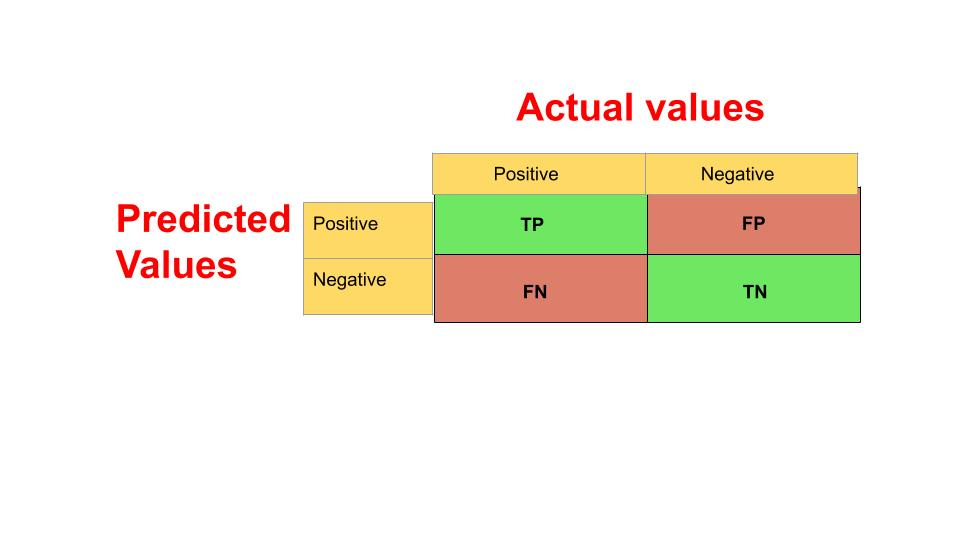

[[80  0]
 [ 9 54]]


<Axes: >

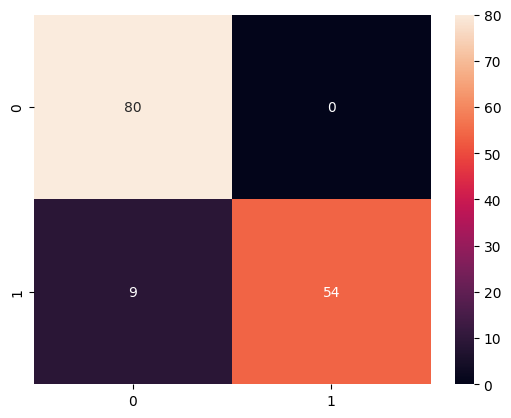

In [30]:
#plot confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, predictions)
import seaborn as sns
print(cm)
sns.heatmap(cm,annot=True)

In [28]:
#get accuracy score for model
from sklearn.metrics import accuracy_score
print(accuracy_score(Y_test,predictions))

0.9370629370629371


In [31]:
print(Y_test)

[1 1 1 0 1 0 1 1 0 1 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 1 0 0
 0 0 1 0 0 0 0 0 0 0 0 1 0 1 0 0 1 0 1 1 1 0 1 0 1 1 1 1 0 0 0 0 0 1 0 1 1
 0 0 0 1 1 1 0 1 0 0 1 1 1 0 0 0 1 1 0 0 1 1 1 0 0 0 0 1 0 0 1 0 0 1 0 1 1
 1 0 0 0 0 1 0 1 1 1 0 1 1 0 0 0 1 1 1 1 0 1 0 1 0 0 1 1 1 1 0 1]


In [32]:
print(predictions)

[1 1 0 0 1 0 1 1 0 1 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0
 0 0 1 0 0 0 0 0 0 0 0 1 0 1 0 0 1 0 1 1 1 0 1 0 1 1 1 1 0 0 0 0 0 1 0 1 1
 0 0 0 1 1 1 0 1 0 0 1 1 1 0 0 0 1 1 0 0 1 1 1 0 0 0 0 1 0 0 1 0 0 0 0 0 1
 1 0 0 0 0 1 0 0 0 1 0 1 0 0 0 0 0 1 1 1 0 1 0 0 0 0 1 1 1 1 0 1]
